<a href="https://colab.research.google.com/github/amieranazriey/Bank-Customer-Churn-Prediction-Project/blob/main/notebooks/bank_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd

url = "https://raw.githubusercontent.com/amieranazriey/Bank-Customer-Churn-Prediction-Project/refs/heads/main/data/bank_churn.csv"
df = pd.read_csv(url)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Phase 1 - data understanding & cleaning

In [98]:
df.info() # dataset contains no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [99]:
df.describe() # data is complete

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [100]:
print(df.shape)
print("\nColumn Names:", df.columns.values.tolist())
print("\nColumn Data Types:\n",df.dtypes)

(10000, 14)

Column Names: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

Column Data Types:
 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [101]:
import re

# rename column's names
def cleanup_column_names(df, rename_dict={}, do_inplace=True):
    """This function renames column of a pandas dataframe
        It converts column names to snake case if rename_dict is not passed.
    Args:
      rename_dict(dict):keys represent old column names and values point to newer ones
      do_inplace(bool):flag to update existing dataframe or return a new one
    Returns:
      pandas dataframe if do_inplace is False, otherwise None
    """
    if not rename_dict:
      return df.rename(columns={col: re.sub(r'(?<!^)(?=[A-Z])', '_', col).lower()
                  for col in df.columns.values.tolist()},
                inplace=do_inplace)
    else:
      return df.rename(columns=rename_dict, inplace=do_inplace)

In [102]:
cleanup_column_names(df)
df.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [103]:
# change incorrect data type
object_cols = df.select_dtypes(include=['object']).columns
if not object_cols.empty:
  df[object_cols] = df[object_cols].astype('str')

print(df.dtypes)

row_number            int64
customer_id           int64
surname              object
credit_score          int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_cr_card           int64
is_active_member      int64
estimated_salary    float64
exited                int64
dtype: object


In [104]:
# check duplicated data
df[df.duplicated(subset=['customer_id'])]

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited


In [105]:
# check missing values
print('Check missing values: ', df.isnull().sum())

Check missing values:  row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64


In [106]:
# cleanup - to drop irrelevant columns
df.drop(columns=['row_number', 'customer_id', 'surname'], inplace=True)

df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [107]:
# encoded bool data into int
df['encoded_gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df = pd.get_dummies(df, columns=['geography'], dtype=int)
df.drop(columns=['gender'], inplace=True)

df.tail(20)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,encoded_gender,geography_France,geography_Germany,geography_Spain
9980,741,35,6,74371.49,1,0,0,99595.67,0,0,0,0,1
9981,498,42,3,152039.70,1,1,1,53445.17,1,0,0,1,0
9982,655,46,7,137145.12,1,1,0,115146.40,1,1,0,1,0
9983,613,40,4,0.00,1,0,0,151325.24,0,0,1,0,0
9984,602,35,7,90602.42,2,1,1,51695.41,0,0,0,1,0
9985,659,36,6,123841.49,2,1,0,96833.00,0,0,1,0,0
9986,673,47,1,183579.54,2,0,1,34047.54,0,0,0,1,0
9987,606,30,8,180307.73,2,1,1,1914.41,0,0,0,0,1
9988,775,30,4,0.00,2,1,0,49337.84,0,0,1,0,0
9989,841,28,4,0.00,2,1,1,179436.60,0,0,0,0,1


In [108]:
# normalization and feature scaling
x = df.drop(columns=['exited'])
y = df['exited']

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Scale features for Logistic Regression
from sklearn.preprocessing import StandardScaler
# Select numerical columns
cols_to_scale = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
# Put back into DataFrame
x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

x_train_scaled[cols_to_scale] = scaler.fit_transform(x_train[cols_to_scale])
x_test_scaled[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

In [118]:
print(x_train_scaled.shape)
x_train_scaled.head()



(8000, 12)


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,encoded_gender,geography_France,geography_Germany,geography_Spain
9254,0.356500,-0.655786,0.345680,-1.218471,0.808436,1,1,1.367670,0,1,0,0
1561,-0.203898,0.294938,-0.348369,0.696838,0.808436,1,1,1.661254,0,0,1,0
1670,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,1,0,-0.252807,0,0,0,1
6087,-0.940717,-1.131148,1.386753,0.953212,-0.916688,1,0,0.915393,1,1,0,0
6669,-1.397337,1.625953,1.386753,1.057449,-0.916688,0,0,-1.059600,0,1,0,0


# Phase 2 - Exploratory Data Analysis

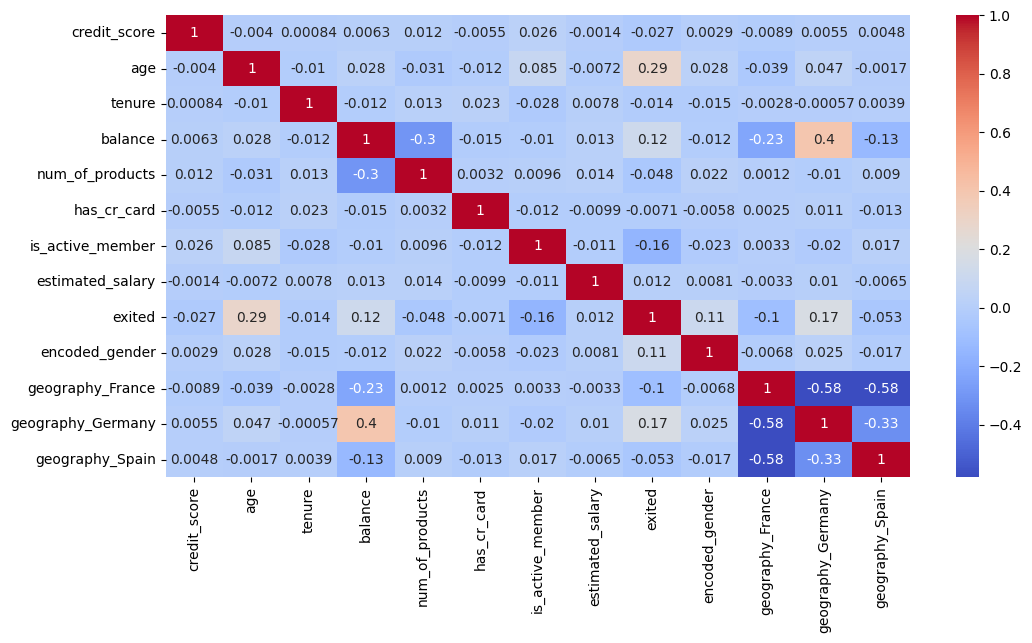

In [122]:
# heat map to check relationship between columns
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')
plt.show()

*   age - strongest positive correlation
* is_active_member - weak negative correlation, active mebers are slightly less likely to leave than inactive ones
* balance - slight positive link to exiting


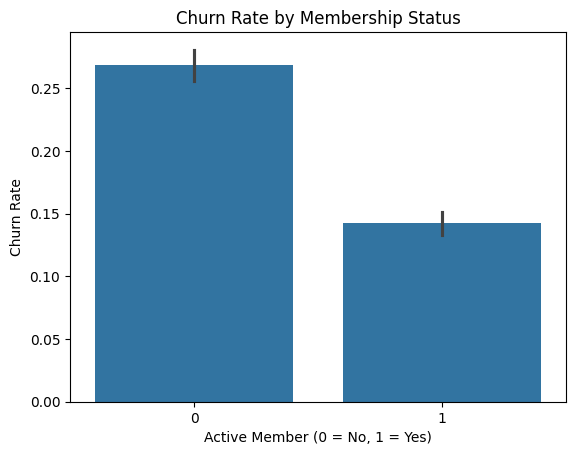

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    x='is_active_member',
    y='exited',
    data=df
)

plt.title('Churn Rate by Membership Status')
plt.xlabel('Active Member (0 = No, 1 = Yes)')
plt.ylabel('Churn Rate')
plt.show()



*   customers who are not active members (0) churn at a rate of roughy 27%, while active members churn at only about 14%
* business action - 'engagement campaigns' - provide incentive for app logins, transactions



<function matplotlib.pyplot.show(close=None, block=None)>

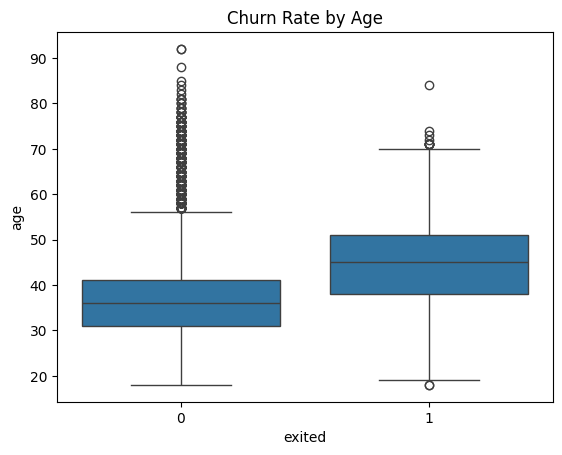

In [112]:
sns.boxplot(x='exited', y='age', data=df)
plt.title('Churn Rate by Age')
plt.show




*   median age for customers who stayed (0) is roighly 36-37, while the median age for customers who left (1) is significantly higher, around 45
* alert zone - customers who exited is primarily between 38 and 52, tell us that midle-aged customers are our primary churn risk
* safe zone - younger customers (under 30) have much higher density in the 'stayed' category



<function matplotlib.pyplot.show(close=None, block=None)>

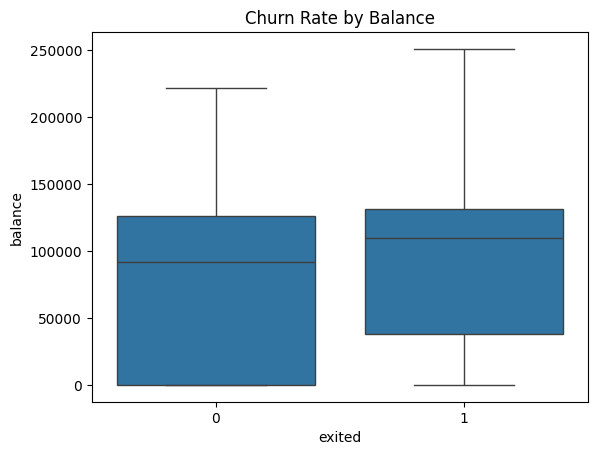

In [113]:
sns.boxplot(x='exited', y='balance', data=df)
plt.title('Churn Rate by Balance')
plt.show



*   bottom whisker - go all the way to 0, the box is wider at bottom, inform us that a large group of loyal customers has a $0 balance

* higher balance = higher risk
* the churned group is concentrated between $50,00 and $150,000 - this is red warning for our bank because the customers that churn are custoemrs with significant assets leaving the bank, most probably our high valued customers, need to do precations step to prevent thest group form churning



# Feature Selection

In [127]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x_test_scaled, y, discrete_features=False)
mi_results = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_results = mi_results.sort_values(by='MI Score', ascending=False)

print("Top features by Mutual Information:")
print(mi_results.head(10))

ValueError: Found input variables with inconsistent numbers of samples: [2000, 10000]

# Phase 4 - Modelling + evaluation


In [119]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

results_clf = {}

dtc = DecisionTreeClassifier(max_depth=6, random_state=42)
dtc.fit(x_train, y_train)
bank_dtc = dtc.predict(x_test)
results_clf['DecisionTree'] = {
    'accuracy': accuracy_score(y_test, bank_dtc),
    'roc_auc': roc_auc_score(y_test, dtc.predict_proba(x_test_scaled)[:,1])
}

results_clf['DecisionTree']

{'accuracy': 0.8605, 'roc_auc': np.float64(0.6492848558548715)}

In [120]:
importances = pd.Series(dtc.feature_importances_, index=x.columns)
importances.sort_values(ascending=False).head(10)

,0
age,0.397801
num_of_products,0.305046
is_active_member,0.149763
balance,0.075975
geography_Germany,0.047781
estimated_salary,0.014202
credit_score,0.004167
tenure,0.002203
encoded_gender,0.001573
geography_France,0.001488


In [128]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rfc.fit(x_train, y_train)
bank_rfc = rfc.predict(x_test)
results_clf['RandomForest'] = {
    'accuracy': accuracy_score(y_test, bank_rfc),
    'roc_auc': roc_auc_score(y_test, rfc.predict_proba(x_test_scaled)[:,1])
}

results_clf['RandomForest']

{'accuracy': 0.8585, 'roc_auc': np.float64(0.415184205234415)}

In [129]:
importances = pd.Series(rfc.feature_importances_, index=x.columns)
importances.sort_values(ascending=False)

,0
age,0.391249
num_of_products,0.302763
is_active_member,0.091804
balance,0.062618
geography_Germany,0.053451
credit_score,0.028811
estimated_salary,0.021699
encoded_gender,0.018055
tenure,0.011557
geography_France,0.010870


In [130]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)

bank_lr = lr.predict(x_test_scaled)
results_clf['LogisticRegression'] = {
 'accuracy': accuracy_score(y_test, bank_lr),
 'roc_auc': roc_auc_score(y_test, lr.predict_proba(x_test_scaled)[:,1])
}

results_clf['LogisticRegression']

{'accuracy': 0.8115, 'roc_auc': np.float64(0.778941051474861)}

In [131]:
pd.Series(lr.coef_[0], index=x.columns).sort_values()

importances.sort_values(ascending=False)

,0
age,0.391249
num_of_products,0.302763
is_active_member,0.091804
balance,0.062618
geography_Germany,0.053451
credit_score,0.028811
estimated_salary,0.021699
encoded_gender,0.018055
tenure,0.011557
geography_France,0.010870


In [132]:
pd.DataFrame(results_clf).T

,accuracy,roc_auc
DecisionTree,0.8605,0.649285
RandomForest,0.8585,0.415184
LogisticRegression,0.8115,0.778941


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score